## Lead Scoring Case Study

#### Importing the libraries

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import 'numpy' and 'pandas' for working with numbers and data frames
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import method for regression from 'statsmodels'
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Import method for regression from 'sklearn'
from sklearn.linear_model import LinearRegression

# Import 'train_test_split' from 'sklearn' for train-validation-test split
from sklearn.model_selection import train_test_split

# Import 'mean_squared_error' from 'sklearn' for error computations
from sklearn.metrics import mean_squared_error

# Import the min-max scaled from 'sklearn'
from sklearn.preprocessing import MinMaxScaler

# Import the ridge and LASSO regression models from 'sklearn'
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression



# Import method to compute VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Step 1 : Importing the dataset

In [2]:
# load the dataset
df=pd.read_csv(r"C:\Users\Mansi\Downloads\Leads.csv")
df

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  ... Get updates on DM Content    Lead Profile  \
0                     0.00  ...                        No          Select   
1                     2.50  ...                        No          Select   
2                     2.00  ...                        No  Potential Lead   
3                     1.00  ...                        No          Select   
4                     1.00  ...                        No          Select   
...                    ...  ...                       ...             ...   
9235                  2.67  ...                        No  Potential Lead   
9236                  2.00  ...                        No  Potential Lead   
9237                  2.00  ...                        No  Potential Lead   
9238                  3.00  ...                        No             NaN   
9239                  3.00  ...                        No  Potential Lead   

                    City Asymmetrique Activity Index  \
0                 Select                   02.Medium   
1                 Select                   02.Medium   
2                 Mumbai                   02.Medium   
3                 Mumbai                   02.Medium   
4                 Mumbai                   02.Medium   
...                  ...                         ...   
9235              Mumbai                   02.Medium   
9236              Mumbai                   02.Medium   
9237              Mumbai                   02.Medium   
9238  Other Metro Cities                   02.Medium   
9239        Other Cities                   02.Medium   

     Asymmetrique Profile Index Asymmetrique Activity Score  \
0                     02.Medium        

#### Step 2 : Inspecting  the dataset

In [3]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
#checking the number of rows and columns of the application data 
df.shape

(9240, 37)

In [5]:
#checking the information like type of the columns in the application data set
df.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##### There are 37 coumns having datatypes as float,object,int

In [6]:
#checking numeric variables of the dataframe
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

#### Step 3 : Data Preparation

In [7]:
# Replacing select with NAN means the customer hasnt selected any lead profile or city
df=df.replace("Select" , np.nan)
df

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  ... Get updates on DM Content    Lead Profile  \
0                     0.00  ...                        No             NaN   
1                     2.50  ...                        No             NaN   
2                     2.00  ...                        No  Potential Lead   
3                     1.00  ...                        No             NaN   
4                     1.00  ...                        No             NaN   
...                    ...  ...                       ...             ...   
9235                  2.67  ...                        No  Potential Lead   
9236                  2.00  ...                        No  Potential Lead   
9237                  2.00  ...                        No  Potential Lead   
9238                  3.00  ...                        No             NaN   
9239                  3.00  ...                        No  Potential Lead   

                    City Asymmetrique Activity Index  \
0                    NaN                   02.Medium   
1                    NaN                   02.Medium   
2                 Mumbai                   02.Medium   
3                 Mumbai                   02.Medium   
4                 Mumbai                   02.Medium   
...                  ...                         ...   
9235              Mumbai                   02.Medium   
9236              Mumbai                   02.Medium   
9237              Mumbai                   02.Medium   
9238  Other Metro Cities                   02.Medium   
9239        Other Cities                   02.Medium   

     Asymmetrique Profile Index Asymmetrique Activity Score  \
0                     02.Medium        

In [8]:
# checking the % of the null values of all the columns.
#since there 37 columns we define a function to find the null values of all the columns.
def null_values(df):
    return round((100*df.isnull().mean()).sort_values(ascending=False),2)

In [9]:
null_values(df)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [10]:
# Creating a variable nullvalues_above_40 to find all the columns with more then 40% missing values.
nullvalues_above_40=null_values(df)[null_values(df)>40]
nullvalues_above_40


How did you hear about X Education    78.46
Lead Profile                          74.19
Lead Quality                          51.59
Asymmetrique Profile Score            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
dtype: float64

In [11]:
nullvalues_above_40.index


Index(['How did you hear about X Education', 'Lead Profile', 'Lead Quality',
       'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index'],
      dtype='object')

In [12]:
# Dropping the 49 columns having  missing values more then 40%
df.drop(columns=nullvalues_above_40.index,inplace=True)

In [13]:
df.shape

(9240, 30)

In [14]:
df = df.drop(['Tags', 'City', 'Lead Number'], axis=1, errors='ignore')
df

Prospect ID              Lead Origin  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1     2a272436-5132-4136-86fa-dcc88c88f482                      API   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4     3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   
...                                    ...                      ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9  Landing Page Submission   
9236  82a7005b-7196-4d56-95ce-a79f937a158d  Landing Page Submission   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c  Landing Page Submission   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9  Landing Page Submission   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff  Landing Page Submission   

         Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0         Olark Chat           No          No          0          0.0   
1     Organic Search           No          No          0          5.0   
2     Direct Traffic           No          No          1          2.0   
3     Direct Traffic           No          No          0          1.0   
4             Google           No          No          1          2.0   
...              ...          ...         ...        ...          ...   
9235  Direct Traffic          Yes          No          1          8.0   
9236  Direct Traffic           No          No          0          2.0   
9237  Direct Traffic          Yes          No          0          2.0   
9238          Google           No          No          1          3.0   
9239  Direct Traffic           No          No          1          6.0   

      Total Time Spent on Website  Page Views Per Visit  \
0                               0                  0.00   
1                             674                  2.50   
2                            1532                  2.00   
3                             305                  1.00   
4                            1428                  1.00   
...                           ...                   ...   
9235                         1845                  2.67   
9236                          238                  2.00   
9237                          199                  2.00   
9238                          499                  3.00   
9239                         1279                  3.00   

                Last Activity  ... X Education Forums Newspaper  \
0     Page Visited on Website  ...                 No        No   
1                Email Opened  ...                 No        No   
2                Email Opened  ...                 No        No   
3                 Unreachable  ...                 No        No   
4           Converted to Lead  ...                 No        No   
...                       ...  ...                ...       ...   
9235        Email Marked Spam  ...                 No        No   
9236                 SMS Sent  ...                 No        No   
9237                 SMS Sent  ...                 No        No   
9238                 SMS Sent  ...                 No        No   
9239                 SMS Sent  ...                 No        No   

     Digital Advertisement Through Recommendations  \
0                       No                      No   
1                       No                      No   
2                       No                      No   
3                       No                      No   
4                       No                      No   
...                    ...                     ...   
9235                    No                      No   
9236                    No                      No   
9237                    No                      No   
9238                    No                      No   
9239                    No                      No   

     Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                        No              

In [15]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

Prospect ID                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [16]:
# Dropping columns that have unique values 
columns_to_drop = ['Prospect ID','Receive More Updates About Our Courses ', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque ', 'Magazine']
existing_columns = [col for col in columns_to_drop if col in df.columns]
df = df.drop(existing_columns, axis=1)
df

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit            Last Activity       Country  ... Search  \
0                     0.00  Page Visited on Website           NaN  ...     No   
1                     2.50             Email Opened         India  ...     No   
2                     2.00             Email Opened         India  ...     No   
3                     1.00              Unreachable         India  ...     No   
4                     1.00        Converted to Lead         India  ...     No   
...                    ...                      ...           ...  ...    ...   
9235                  2.67        Email Marked Spam  Saudi Arabia  ...     No   
9236                  2.00                 SMS Sent         India  ...     No   
9237                  2.00                 SMS Sent         India  ...     No   
9238                  3.00                 SMS Sent         India  ...     No   
9239                  3.00                 SMS Sent    Bangladesh  ...     No   

     Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                   No                 No        No                    No   
1                   No                 No        No                    No   
2                   No                 No        No                    No   
3                   No                 No        No                    No   
4                   No                 No        No                    No   
...                ...                ...       ...                   ...   
9235                No                 No        No                    No   
9236                No                 No        No                    No   
9237                No                 No        No                    No   
9238                No                 No        No                    No   
9239                No                 No        No                    No   

     Through Recommendations Receive More Updates About Our Courses  \
0                         No                                     No   
1                         No                                     No   
2                         No                                     No   
3                         No                                     No   
4                         No                                     No   
...                      ...                                    ...   
9

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [18]:
# Checking the percentage of missing values

round((df.isnull().sum()/len(df)*100),2).sort_values(ascending = False)

Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
I agree to pay the amount through cheque          0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Lead Origin                                       0.00
Newspaper Article                                 0.00
Search                                            0.00
Total Time

In [19]:
# The 4 columns have high null values if we drop the columns then we will loose large amount of data therefore we replace the null values with 'not provided'
df['Specialization'] = df['Specialization'].fillna('not provided') 
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('not provided')
df['Country'] = df['Country'].fillna('not provided')
df['What is your current occupation'] = df['What is your current occupation'].fillna('not provided')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [20]:
df.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity       Country  ... Search Newspaper Article  \
0  Page Visited on Website  not provided  ...     No                No   
1             Email Opened         India  ...     No                No   
2             Email Opened         India  ...     No                No   
3              Unreachable         India  ...     No                No   
4        Converted to Lead         India  ...     No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

  Receive More Updates About Our Courses  \
0                                     No   
1                                     No   
2                                     No   
3                                     No   
4                                     No   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 23 columns]

In [21]:
df.isnull().sum()

Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                              0
Through Recommendations                       

In [22]:
# Converting all the values to lower case
df=df.applymap(lambda x:x.lower() if type(x)==str else x)

In [23]:
# Checking vlaue counts of 'Country'
df['Country'].value_counts()

Country
india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switze

In [24]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df['Country'] = df.apply(lambda x:slots(x['Country']), axis = 1)
df['Country'].value_counts()

Country
india            6492
not provided     2461
outside india     287
Name: count, dtype: int64

In [25]:
# Rechecking the % of null values 
round((df.isnull().sum()/len(df)*100),2).sort_values(ascending = False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Lead Origin                                      0.00
Newspaper Article                                0.00
A free copy of Mastering The Interview           0.00
I agree to pay the amount through cheque         0.00
Receive More Updates About Our Courses           0.00
Through Recommendations                          0.00
Digital Advertisement                            0.00
Newspaper                                        0.00
X Education Forums                               0.00
What is your current occupation                  0.00
Search                                           0.00
What matters most to you in choosing a course    0.00
Specialization                                   0.00
Country                                          0.00
Total Time Spent on Website 

In [26]:
# Check the value counts for the column 'Total Visits'
df['TotalVisits'].value_counts()

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

In [27]:
# Imputing TotalVisits  with median 
df.TotalVisits.fillna(df.TotalVisits.median() , inplace = True) 

In [28]:
# Check the value counts for the column 'Page Views Per Visit'
df['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: count, Length: 114, dtype: int64

In [29]:
# we shall impute the null values in "Page Views Per Visit" by median value 
df['Page Views Per Visit'] = df['Page Views Per Visit'].replace(np.nan, df['Page Views Per Visit'].median())

In [30]:
# since we dont know what the last activity of the customer would have been therefore wecan add  category "not sure" for null value 

df['Last Activity']=df['Last Activity'].replace(np.nan,'Not Sure')

In [31]:
# Rechecking the % of null values 
round((df.isnull().sum()/len(df)*100),2).sort_values(ascending = False)


Lead Source                                      0.39
Lead Origin                                      0.00
What matters most to you in choosing a course    0.00
A free copy of Mastering The Interview           0.00
I agree to pay the amount through cheque         0.00
Receive More Updates About Our Courses           0.00
Through Recommendations                          0.00
Digital Advertisement                            0.00
Newspaper                                        0.00
X Education Forums                               0.00
Newspaper Article                                0.00
Search                                           0.00
What is your current occupation                  0.00
Specialization                                   0.00
Country                                          0.00
Last Activity                                    0.00
Page Views Per Visit                             0.00
Total Time Spent on Website                      0.00
TotalVisits                 

In [32]:
df['Lead Source'] = df['Lead Source'].replace('google', 'Google')
df['Lead Source'] = df['Lead Source'].replace(np.nan, 'Google')

In [33]:
# Rechecking the % of null values 
round((df.isnull().sum()/len(df)*100),2).sort_values(ascending = False)

Lead Origin                                      0.0
What matters most to you in choosing a course    0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
What is your current occupation                  0.0
Lead Source                                      0.0
Specialization                                   0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                             0.0
Total Time Spent on Website                      0.0
TotalVisits                                   

In [34]:
df.shape

(9240, 23)

In [35]:
#Checking value count of target variable 'Converted':-

df.Converted.value_counts()


Converted
0    5679
1    3561
Name: count, dtype: int64

## 2.EDA
#### Univariate Analysis 


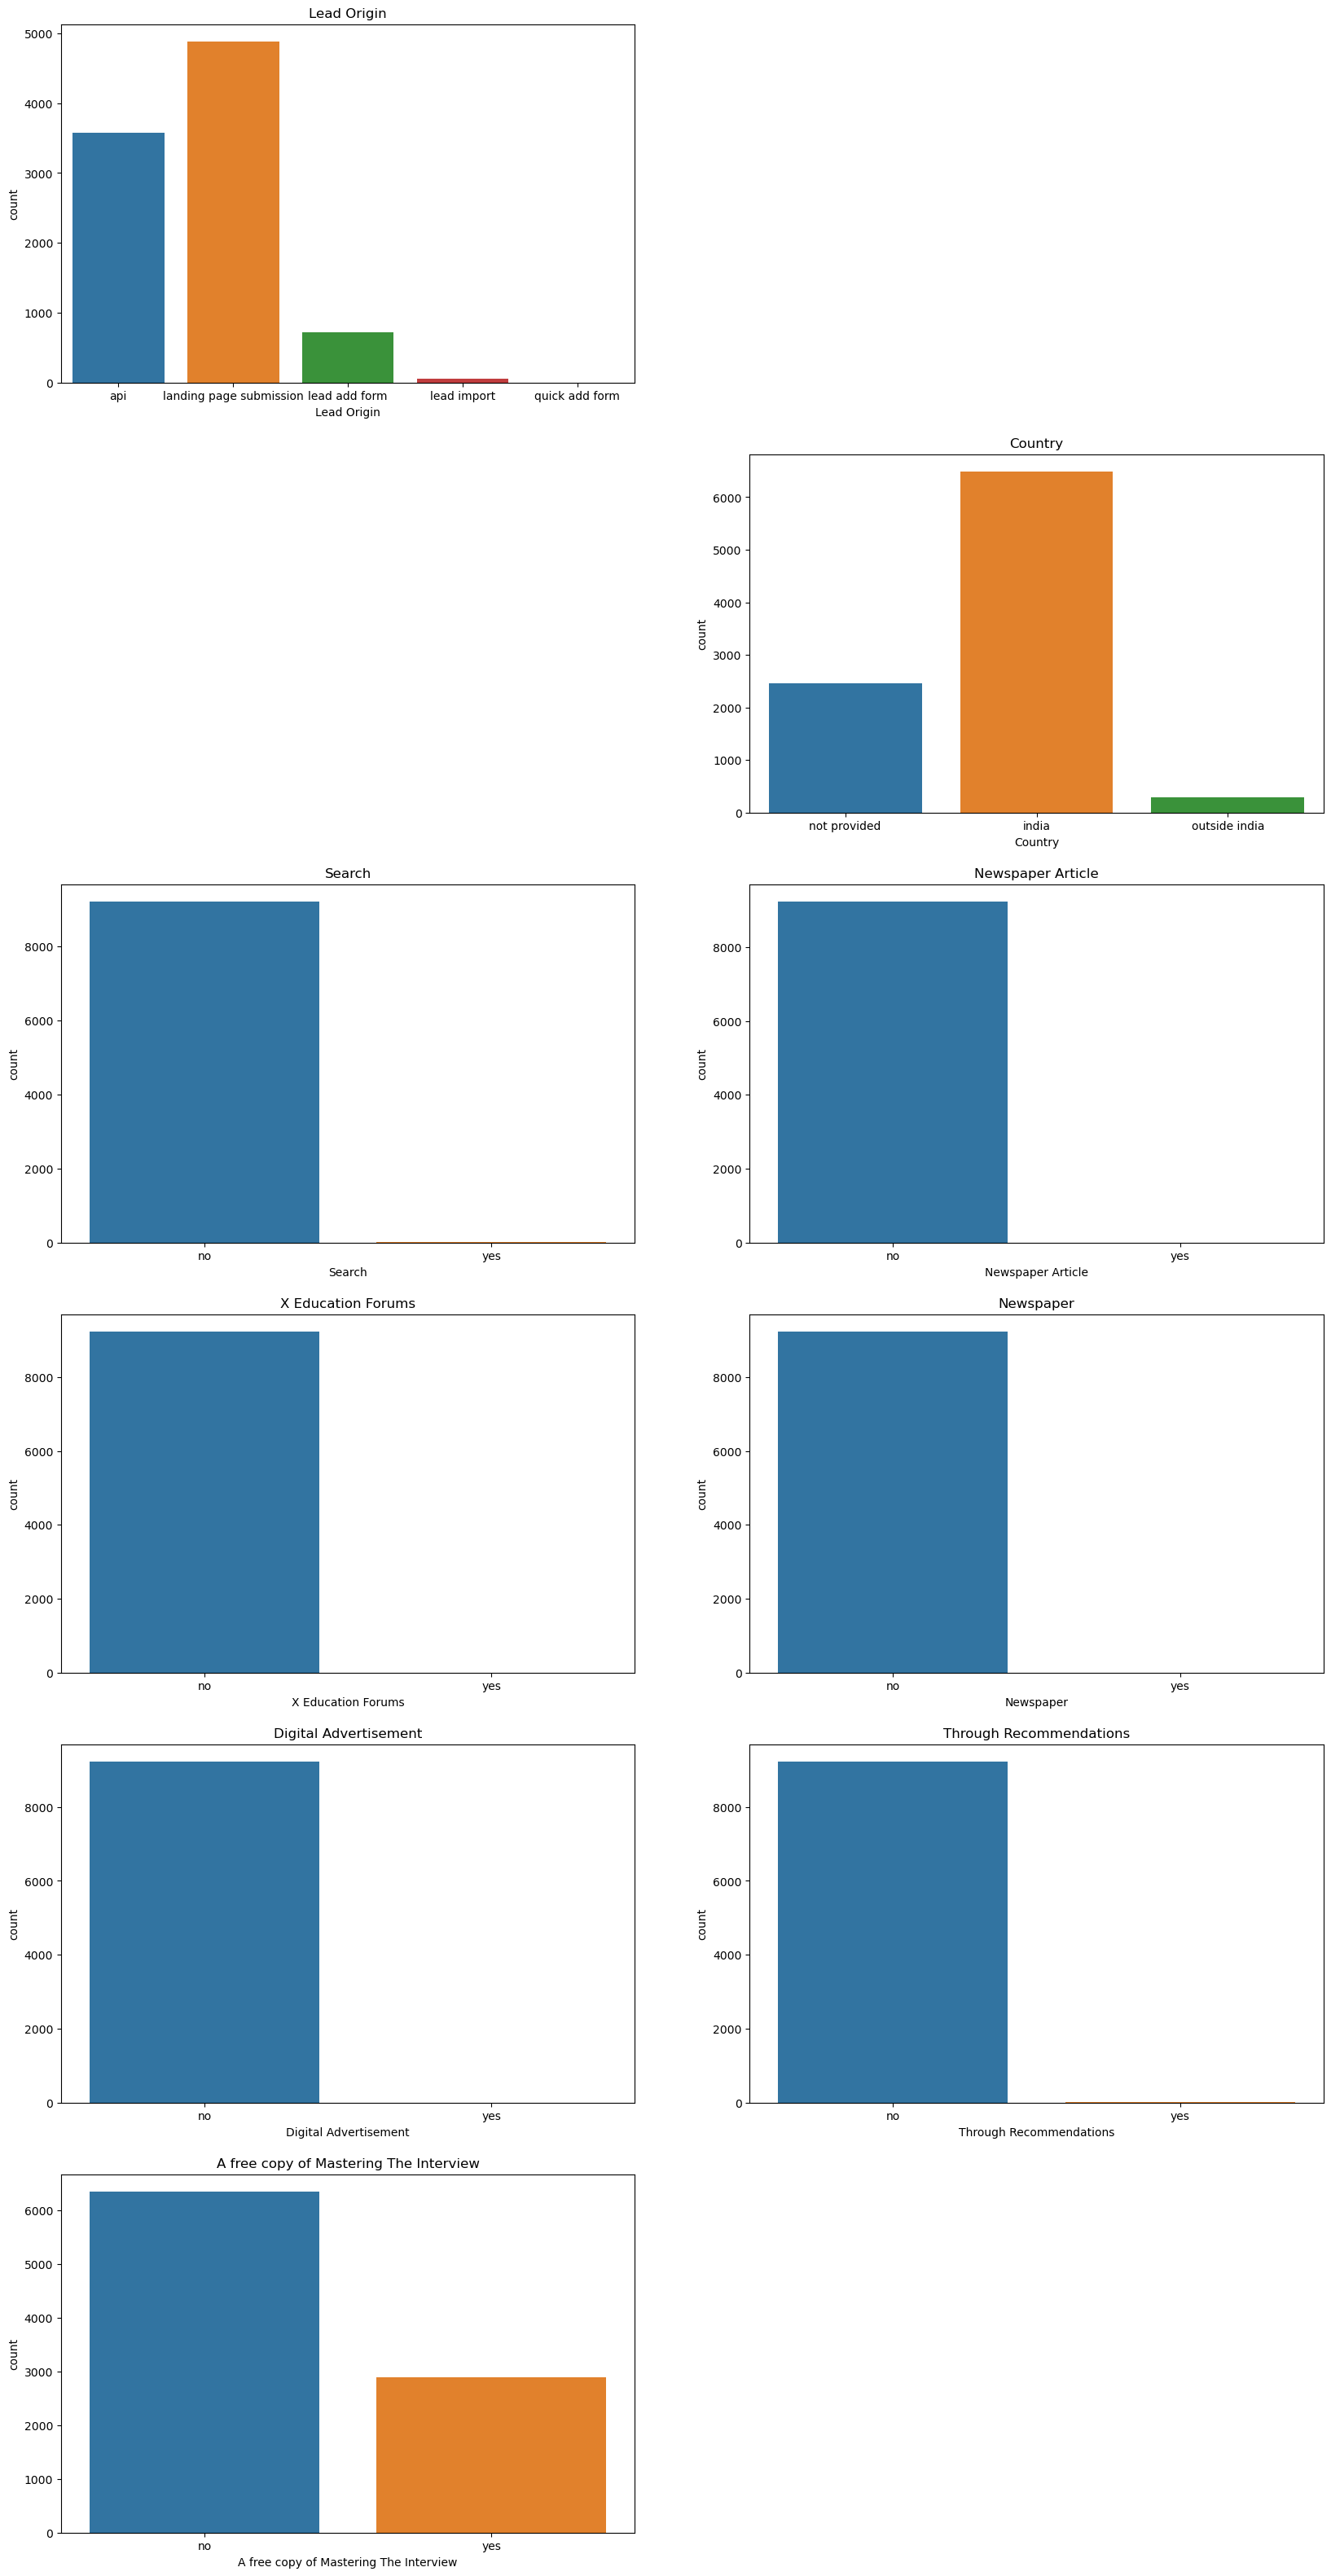

In [36]:
plt.figure(figsize=(20, 40))

plt.subplot(6, 2, 1)
sns.countplot(x='Lead Origin', data=df)
plt.title('Lead Origin')

plt.subplot(6,2,4)
sns.countplot(x='Country',data=df)
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(x='Search',data=df)
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(x='Newspaper Article',data=df)
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(x='X Education Forums',data=df)
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(x='Newspaper',data=df)
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(x='Digital Advertisement',data=df)
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(x='Through Recommendations',data=df)
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(x='A free copy of Mastering The Interview',data=df)
plt.title('A free copy of Mastering The Interview')

#plt.subplot(6,2,12)
#sns.countplot(x='Last Notable Activity',data=df).tick_params(axis='x', rotation = 90)
#plt.title('Last Notable Activity')


plt.show()

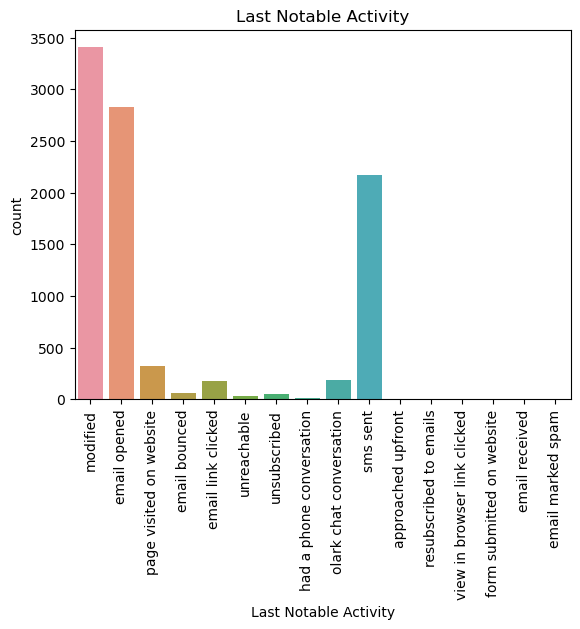

In [37]:
#plt.subplot(6,2,12)
sns.countplot(x='Last Notable Activity',data=df).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

In [38]:
# checking which columns are under categorical and numerical.
# Categorical Columns 
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical Columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']
Numerical columns : ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


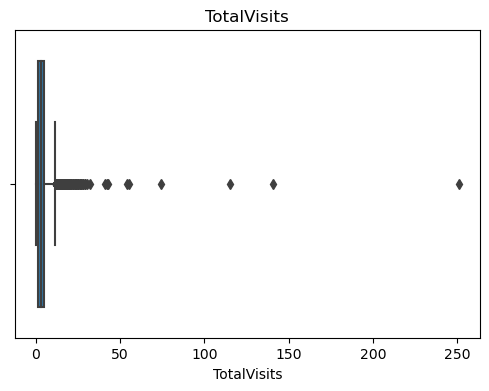

In [39]:
plt.figure(figsize = (6, 4))
sns.boxplot(data = df, x = 'TotalVisits')
plt.title('TotalVisits')
plt.show()

In [40]:
df[['TotalVisits']].describe()

TotalVisits
count  9240.000000
mean      3.438636
std       4.819024
min       0.000000
25%       1.000000
50%       3.000000
75%       5.000000
max     251.000000

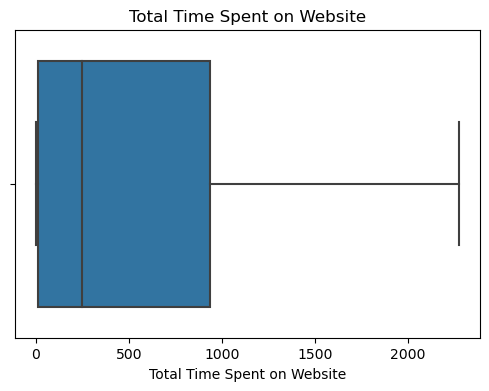

In [41]:
plt.figure(figsize = (6, 4))
sns.boxplot(data = df, x = 'Total Time Spent on Website')
plt.title('Total Time Spent on Website')
plt.show()

In [42]:
df[['Total Time Spent on Website']].describe()

Total Time Spent on Website
count                  9240.000000
mean                    487.698268
std                     548.021466
min                       0.000000
25%                      12.000000
50%                     248.000000
75%                     936.000000
max                    2272.000000

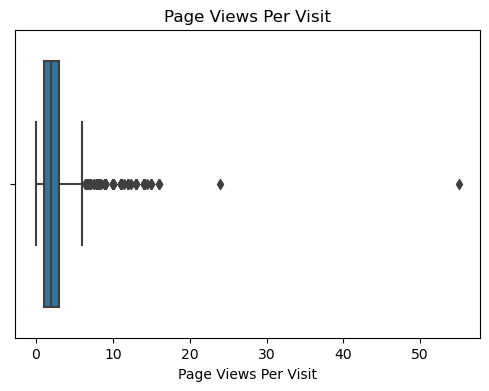

In [43]:
plt.figure(figsize = (6, 4))
sns.boxplot(data = df, x = 'Page Views Per Visit')
plt.title('Page Views Per Visit')
plt.show()

In [44]:
df[['Page Views Per Visit']].describe()

Page Views Per Visit
count           9240.000000
mean               2.357440
std                2.145781
min                0.000000
25%                1.000000
50%                2.000000
75%                3.000000
max               55.000000

There are no outliers in any of the numerical columns since there is huge difference in 75% and max

#### Relating all the categorical columns to "converted" 

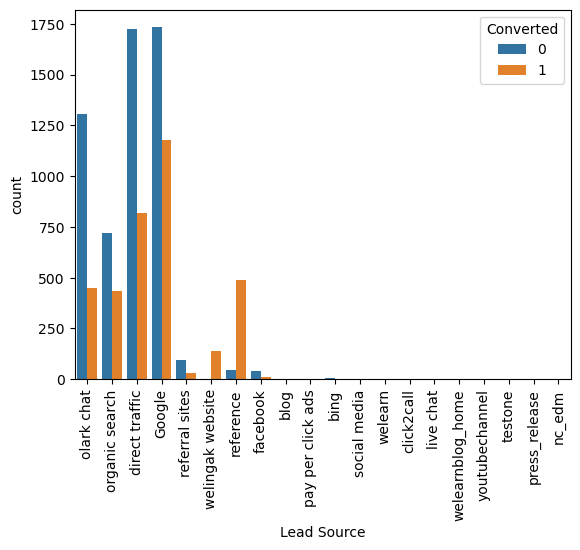

In [45]:
sns.countplot(df,x='Lead Source',hue="Converted")
plt.xticks(rotation=90)
plt.show()

Observation:
- "Google" and "direct traffic" generates more number of leads 

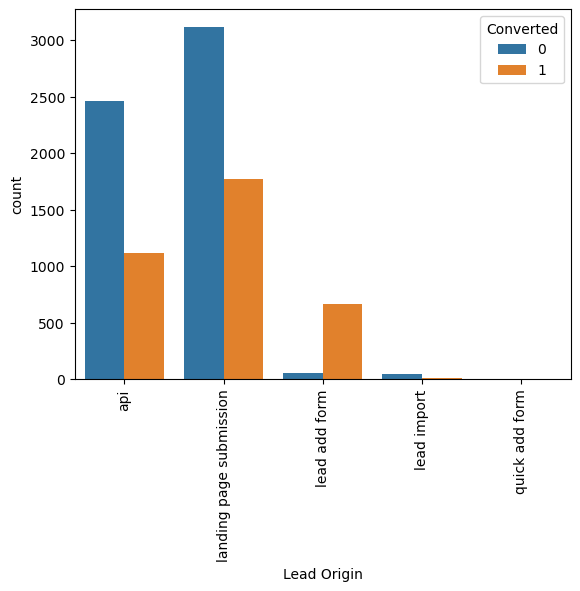

In [46]:
sns.countplot(df,x='Lead Origin',hue="Converted")
plt.xticks(rotation=90)
plt.show()

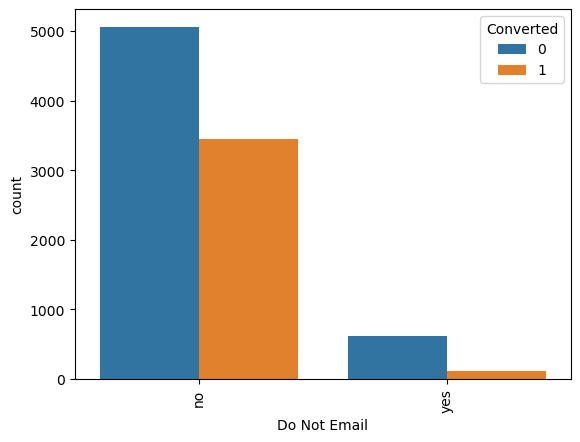

In [47]:
sns.countplot(df,x='Do Not Email',hue="Converted")
plt.xticks(rotation=90)
plt.show()

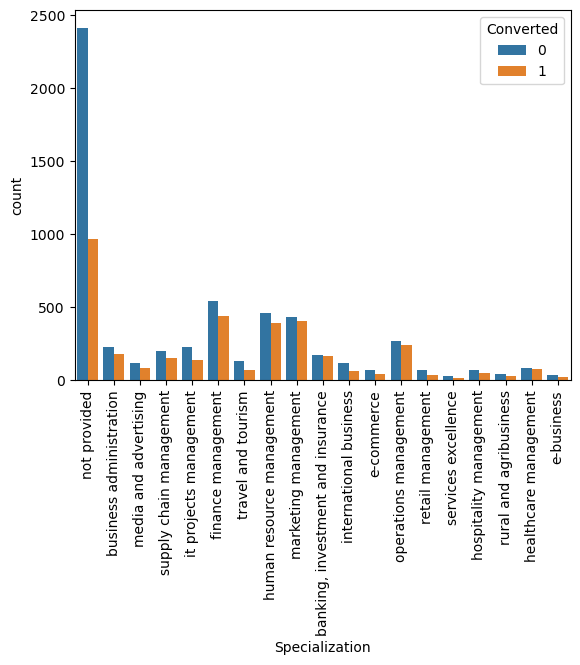

In [48]:
sns.countplot(df,x='Specialization',hue="Converted")
plt.xticks(rotation=90)
plt.show()

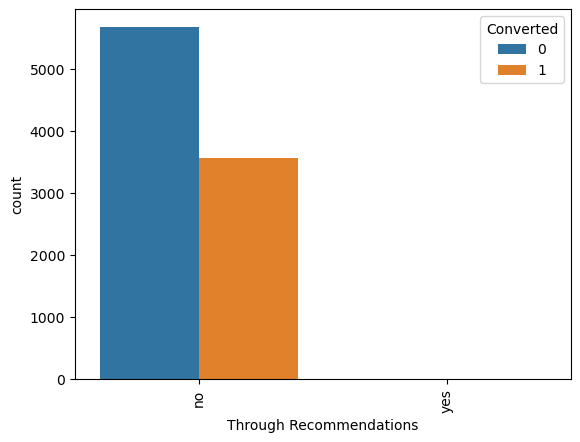

In [49]:
sns.countplot(df,x='Through Recommendations',hue="Converted")
plt.xticks(rotation=90)
plt.show()

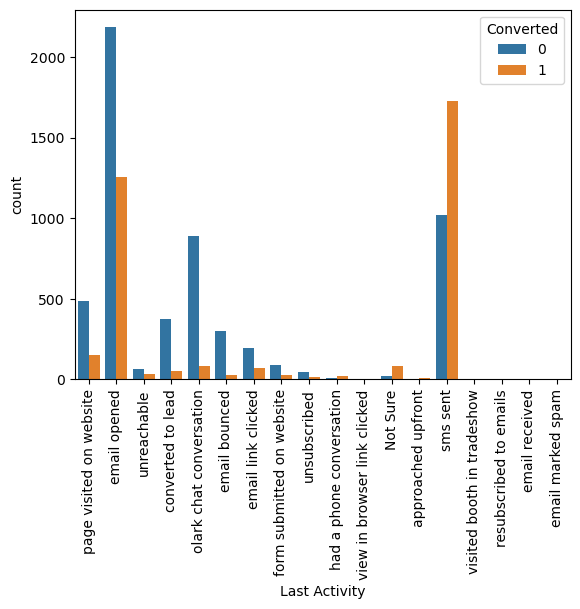

In [50]:
sns.countplot(df,x='Last Activity',hue="Converted")
plt.xticks(rotation=90)
plt.show()

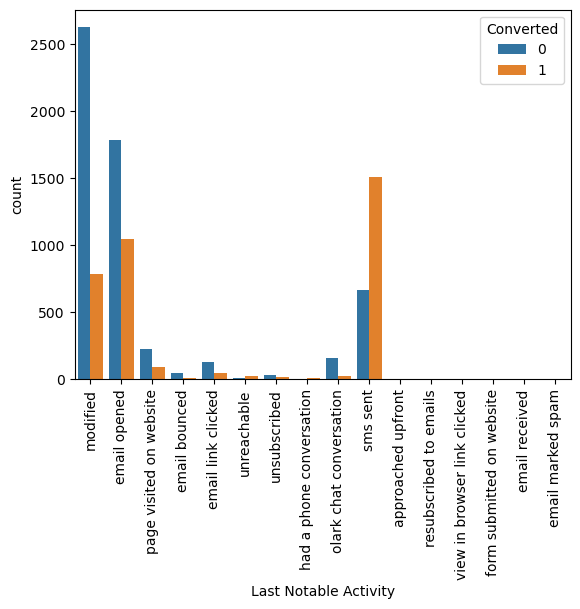

In [51]:
sns.countplot(df,x='Last Notable Activity',hue="Converted")
plt.xticks(rotation=90)
plt.show()

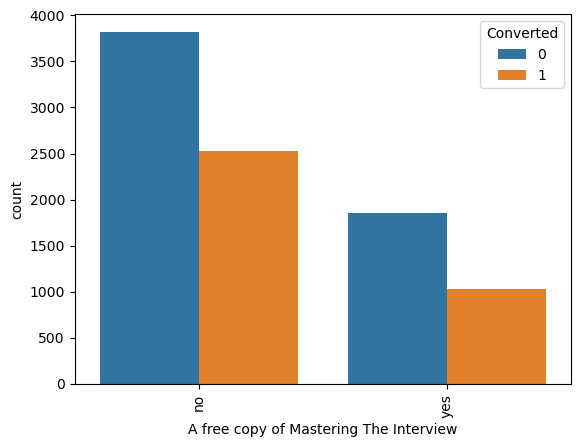

In [52]:
sns.countplot(df,x='A free copy of Mastering The Interview',hue="Converted")
plt.xticks(rotation=90)
plt.show()

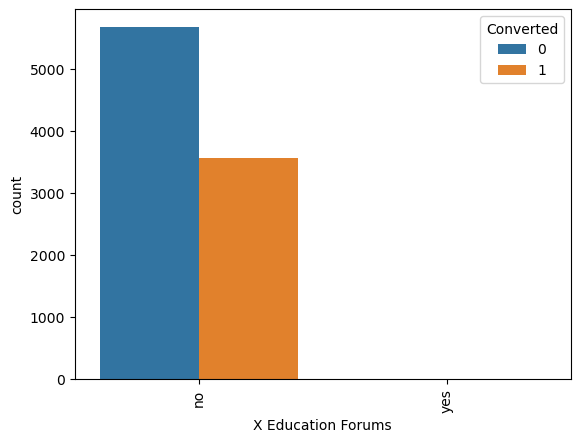

In [53]:
sns.countplot(df,x='X Education Forums',hue="Converted")
plt.xticks(rotation=90)
plt.show()

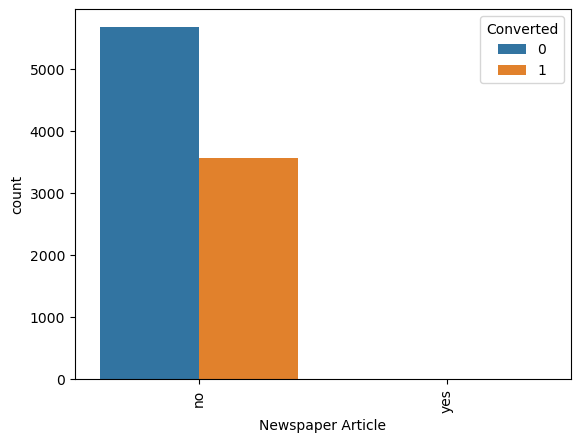

In [54]:
sns.countplot(df,x='Newspaper Article',hue="Converted")
plt.xticks(rotation=90)
plt.show()

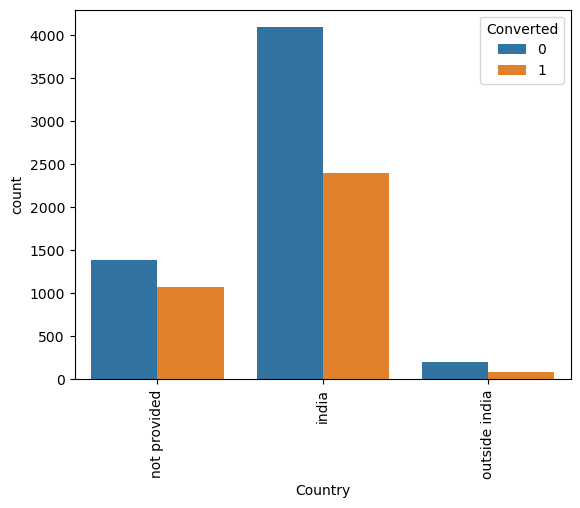

In [55]:
sns.countplot(df,x='Country',hue="Converted")
plt.xticks(rotation=90)
plt.show()

- Most number of leads are from India 

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

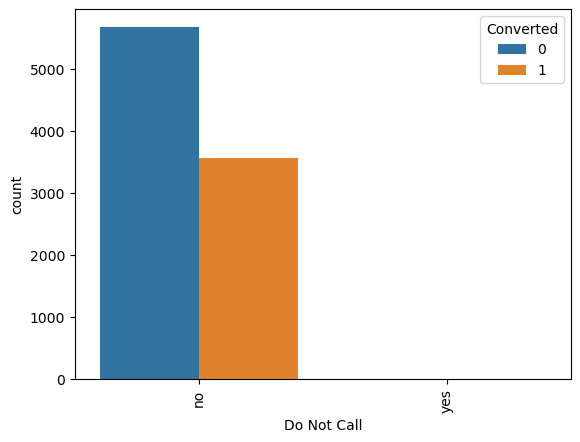

In [56]:
sns.countplot(df,x='Do Not Call',hue="Converted")
plt.xticks(rotation=90)

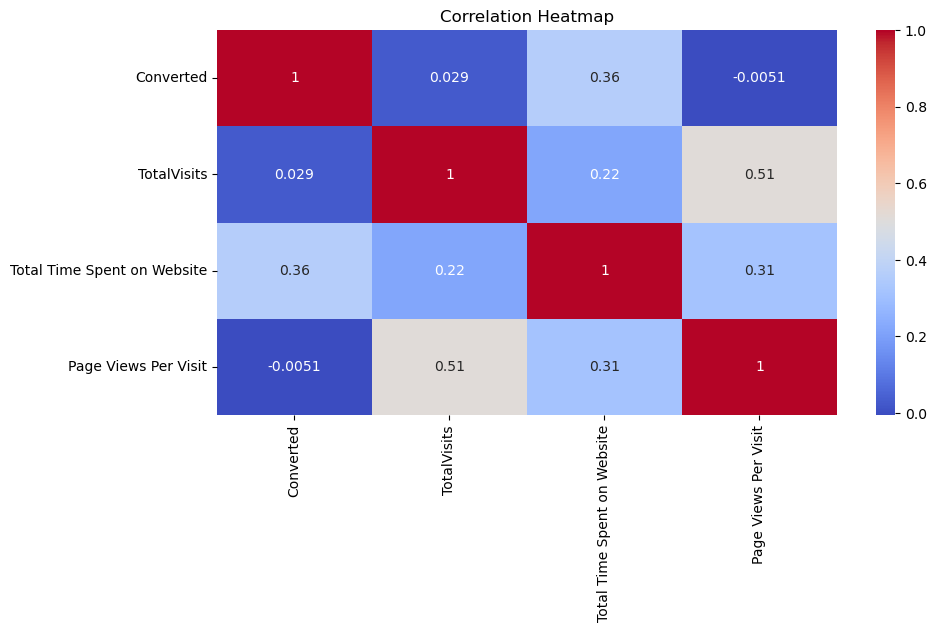

In [57]:
# Select only numeric columns 
numeric_df=df.select_dtypes(include=[float,int])
# To check the correlation among variables 
plt.figure(figsize=(10,5))
sns.heatmap(numeric_df.corr(),annot=True ,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- From the heat map we see that the variables 'TotalVisits','Total Time spent on website' have contributed the most to the lead getting converted 

In [58]:
# Checking the columns which are of type 'object'

temp = df.loc[:, df.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [59]:
# Dropping columns that have unique values 
columns_to_drop1 = ['What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'I agree to pay the amount through cheque']
existing_columns1 = [col for col in columns_to_drop1 if col in df.columns]
df = df.drop(existing_columns1, axis=1)
df

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         api      olark chat           no          no   
1                         api  organic search           no          no   
2     landing page submission  direct traffic           no          no   
3     landing page submission  direct traffic           no          no   
4     landing page submission          Google           no          no   
...                       ...             ...          ...         ...   
9235  landing page submission  direct traffic          yes          no   
9236  landing page submission  direct traffic           no          no   
9237  landing page submission  direct traffic          yes          no   
9238  landing page submission          Google           no          no   
9239  landing page submission  direct traffic           no          no   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit            Last Activity        Country  \
0                     0.00  page visited on website   not provided   
1                     2.50             email opened          india   
2                     2.00             email opened          india   
3                     1.00              unreachable          india   
4                     1.00        converted to lead          india   
...                    ...                      ...            ...   
9235                  2.67        email marked spam  outside india   
9236                  2.00                 sms sent          india   
9237                  2.00                 sms sent          india   
9238                  3.00                 sms sent          india   
9239                  3.00                 sms sent  outside india   

                 Specialization What is your current occupation  \
0                  not provided                      unemployed   
1                  not provided                      unemployed   
2       business administration                         student   
3         media and advertising                      unemployed   
4                  not provided                      unemployed   
...                         ...                             ...   
9235     it projects management                      unemployed   
9236      media and advertising                      unemployed   
9237    business administration                      unemployed   
9238  human resource management                    not provided   
9239    supply chain management                      unemployed   

     A free copy of Mastering The Interview Last Notable Activity  
0                                        no              modified  
1                                        no          email opened  
2                                       yes          email opened  
3                                        no              modified  
4                                        no              modified  
...                                     ...                   ...  
9235                                     no     email marked spam  
9236                                    yes              sms sent  
9237                                    yes              sms sent  
9238                                     no              sms sent  
92

### Dummy Variables 

##### Checking Unique values of some columns so that we can create dummy variables for the columns with multiple levels

In [60]:
df['Lead Origin'].unique()

array(['api', 'landing page submission', 'lead add form', 'lead import',
       'quick add form'], dtype=object)

In [61]:
df['Last Activity'].unique()

array(['page visited on website', 'email opened', 'unreachable',
       'converted to lead', 'olark chat conversation', 'email bounced',
       'email link clicked', 'form submitted on website', 'unsubscribed',
       'had a phone conversation', 'view in browser link clicked',
       'Not Sure', 'approached upfront', 'sms sent',
       'visited booth in tradeshow', 'resubscribed to emails',
       'email received', 'email marked spam'], dtype=object)

In [62]:
df['Specialization'].unique()

array(['not provided', 'business administration', 'media and advertising',
       'supply chain management', 'it projects management',
       'finance management', 'travel and tourism',
       'human resource management', 'marketing management',
       'banking, investment and insurance', 'international business',
       'e-commerce', 'operations management', 'retail management',
       'services excellence', 'hospitality management',
       'rural and agribusiness', 'healthcare management', 'e-business'],
      dtype=object)

In [63]:
df['What is your current occupation'].unique()

array(['unemployed', 'student', 'not provided', 'working professional',
       'businessman', 'other', 'housewife'], dtype=object)

In [64]:
df['Last Notable Activity'].unique()

array(['modified', 'email opened', 'page visited on website',
       'email bounced', 'email link clicked', 'unreachable',
       'unsubscribed', 'had a phone conversation',
       'olark chat conversation', 'sms sent', 'approached upfront',
       'resubscribed to emails', 'view in browser link clicked',
       'form submitted on website', 'email received', 'email marked spam'],
      dtype=object)

In [65]:
df['Lead Source'].unique()

array(['olark chat', 'organic search', 'direct traffic', 'Google',
       'referral sites', 'welingak website', 'reference', 'facebook',
       'blog', 'pay per click ads', 'bing', 'social media', 'welearn',
       'click2call', 'live chat', 'welearnblog_home', 'youtubechannel',
       'testone', 'press_release', 'nc_edm'], dtype=object)

 #### Converting some binary variables (Yes/No) to 0/1

In [66]:
# List of variables to map

varlist =  ['Do Not Email','Do Not Call', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [67]:
df.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      api      olark chat             0            0   
1                      api  organic search             0            0   
2  landing page submission  direct traffic             0            0   
3  landing page submission  direct traffic             0            0   
4  landing page submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity       Country           Specialization  \
0  page visited on website  not provided             not provided   
1             email opened         india             not provided   
2             email opened         india  business administration   
3              unreachable         india    media and advertising   
4        converted to lead         india             not provided   

  What is your current occupation  A free copy of Mastering The Interview  \
0                      unemployed                                       0   
1                      unemployed                                       0   
2                         student                                       1   
3                      unemployed                                       0   
4                      unemployed                                       0   

  Last Notable Activity  
0              modified  
1          email opened  
2          email opened  
3              modified  
4              modified

In [68]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_final_dum = pd.concat([df, dummy], axis=1)
df_final_dum

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                         api      olark chat             0            0   
1                         api  organic search             0            0   
2     landing page submission  direct traffic             0            0   
3     landing page submission  direct traffic             0            0   
4     landing page submission          Google             0            0   
...                       ...             ...           ...          ...   
9235  landing page submission  direct traffic             1            0   
9236  landing page submission  direct traffic             0            0   
9237  landing page submission  direct traffic             1            0   
9238  landing page submission          Google             0            0   
9239  landing page submission  direct traffic             0            0   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit            Last Activity        Country  ...  \
0                     0.00  page visited on website   not provided  ...   
1                     2.50             email opened          india  ...   
2                     2.00             email opened          india  ...   
3                     1.00              unreachable          india  ...   
4                     1.00        converted to lead          india  ...   
...                    ...                      ...            ...  ...   
9235                  2.67        email marked spam  outside india  ...   
9236                  2.00                 sms sent          india  ...   
9237                  2.00                 sms sent          india  ...   
9238                  3.00                 sms sent          india  ...   
9239                  3.00                 sms sent  outside india  ...   

     Last Notable Activity_form submitted on website  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   
...                                              ...   
9235                                           False   
9236                                           False   
9237                                           False   
9238                                           False   
9239                                           False   

     Last Notable Activity_had a phone conversation  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   
...                                             ...   
9235                                          False   
9236                                          False   
9237                                          False   
9238                                          False   
9239                                          False   

      Last Notable Activity_modified  \
0                               True   
1                              False   
2                

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [69]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Lead Origin','Lead Source', 'Last Activity','Country','Specialization','What is your current occupation','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [70]:
df.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      api      olark chat             0            0   
1                      api  organic search             0            0   
2  landing page submission  direct traffic             0            0   
3  landing page submission  direct traffic             0            0   
4  landing page submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity       Country  ...  \
0  page visited on website  not provided  ...   
1             email opened         india  ...   
2             email opened         india  ...   
3              unreachable         india  ...   
4        converted to lead         india  ...   

  Last Notable Activity_form submitted on website  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

  Last Notable Activity_had a phone conversation  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_modified  \
0                            True   
1                           False   
2                           False   
3                            True   
4                            True   

  Last Notable Activity_olark chat conversation  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   

   Last Notable Activity_page visited on website  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_resubscribed to emails  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   

   Last Notable Activity_sms sent  Last Notable Activity_unreachable  \
0                           False                              False   
1                           False                              False   
2                           False                              False   
3                           False                              False   
4                           False                              False   

   Last Notable Activity_unsubscribed  \
0                               False   
1                               False   
2                               False   
3                               False   
4                               False   

   Last Notable Activity_view in browser link clicked  
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   

[

In [71]:
# We have created dummies for the below variables, so we can drop them
df = df.drop(['Lead Origin','Lead Source', 'Last Activity','Country','Specialization','What is your current occupation','Last Notable Activity'], axis=1)

In [72]:
#The varaible was imported as a string we need to convert it to float
df['TotalVisits'] = pd.to_numeric(df['TotalVisits'], errors='coerce')

In [73]:
df['Page Views Per Visit'] = pd.to_numeric(df['Page Views Per Visit'], errors='coerce')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 88 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Do Not Call                                           9240 non-null   int64  
 2   Converted                                             9240 non-null   int64  
 3   TotalVisits                                           9240 non-null   float64
 4   Total Time Spent on Website                           9240 non-null   int64  
 5   Page Views Per Visit                                  9240 non-null   float64
 6   A free copy of Mastering The Interview                9240 non-null   int64  
 7   Lead Origin_landing page submission                   9240 non-null   bool   
 8   Lead Origin_lead add form                             9240

In [75]:
# Converting boolean columns to numeric
boolean_columns = df.select_dtypes(include='bool').columns
df[boolean_columns] = df[boolean_columns].astype(int)



In [76]:
df.head()

Do Not Email  Do Not Call  Converted  TotalVisits  \
0             0            0          0          0.0   
1             0            0          0          5.0   
2             0            0          1          2.0   
3             0            0          0          1.0   
4             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_landing page submission  Lead Origin_lead add form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_lead import  ...  \
0                        0  ...   
1                        0  ...   
2                        0  ...   
3                        0  ...   
4                        0  ...   

   Last Notable Activity_form submitted on website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_had a phone conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_olark chat conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_page visited on website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_sms sent  Last Notable Activity_unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                  

In [77]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Do Not Email                                          0.0
Do Not Call                                           0.0
Converted                                             0.0
TotalVisits                                           0.0
Total Time Spent on Website                           0.0
                                                     ... 
Last Notable Activity_resubscribed to emails          0.0
Last Notable Activity_sms sent                        0.0
Last Notable Activity_unreachable                     0.0
Last Notable Activity_unsubscribed                    0.0
Last Notable Activity_view in browser link clicked    0.0
Length: 88, dtype: float64

In [78]:
df.head()

Do Not Email  Do Not Call  Converted  TotalVisits  \
0             0            0          0          0.0   
1             0            0          0          5.0   
2             0            0          1          2.0   
3             0            0          0          1.0   
4             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_landing page submission  Lead Origin_lead add form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_lead import  ...  \
0                        0  ...   
1                        0  ...   
2                        0  ...   
3                        0  ...   
4                        0  ...   

   Last Notable Activity_form submitted on website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_had a phone conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_olark chat conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_page visited on website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_sms sent  Last Notable Activity_unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                  

### Step 4 :Test-Train-Split


In [79]:
# Putting feature variable to X
X = df.drop(['Converted'], axis=1)

X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_landing page submission  Lead Origin_lead add form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_lead import  Lead Origin_quick add form  ...  \
0                        0                           0  ...   
1                        0                           0  ...   
2                        0                           0  ...   
3                        0                           0  ...   
4                        0                           0  ...   

   Last Notable Activity_form submitted on website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_had a phone conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_olark chat conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_page visited on website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_sms sent  Last Notable Activity_unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_unsubscribed  \
0                                   0   
1                                   0   
2    

In [80]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [81]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [82]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (6468, 87)
y_train Size (6468,)


In [83]:
X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
1871             0            0          0.0                            0   
6795             0            0          4.0                          487   
3516             0            0          5.0                          106   
8105             0            0          5.0                         1230   
3934             0            0          0.0                            0   

      Page Views Per Visit  A free copy of Mastering The Interview  \
1871                  0.00                                       0   
6795                  1.33                                       1   
3516                  2.50                                       0   
8105                  5.00                                       0   
3934                  0.00                                       0   

      Lead Origin_landing page submission  Lead Origin_lead add form  \
1871                                    0                          0   
6795                                    1                          0   
3516                                    0                          0   
8105                                    1                          0   
3934                                    0                          0   

      Lead Origin_lead import  Lead Origin_quick add form  ...  \
1871                        0                           0  ...   
6795                        0                           0  ...   
3516                        0                           0  ...   
8105                        0                           0  ...   
3934                        0                           0  ...   

      Last Notable Activity_form submitted on website  \
1871                                                0   
6795                                                0   
3516                                                0   
8105                                                0   
3934                                                0   

      Last Notable Activity_had a phone conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_modified  \
1871                               0   
6795                               0   
3516                               0   
8105                               0   
3934                               1   

      Last Notable Activity_olark chat conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_page visited on website  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_resubscribed to emails  \
1871                                             0   
6795                                             0   
3516                                             0   
8105                                             0   
3934                                             0   

      Last Notable Activity_sms sent  Last Notable Activity_unreachable  \
1871                               0                                  0   
6795                               0                                  0   
3516                               0                                  0   
8105                               1                                  0   
3934     

In [84]:
X_test.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
4269             0            0          8.0                         1011   
2376             0            0          0.0                            0   
7766             0            0          5.0                           59   
9199             0            0          0.0                            0   
4359             0            0          0.0                            0   

      Page Views Per Visit  A free copy of Mastering The Interview  \
4269                   8.0                                       0   
2376                   0.0                                       0   
7766                   5.0                                       0   
9199                   0.0                                       0   
4359                   0.0                                       0   

      Lead Origin_landing page submission  Lead Origin_lead add form  \
4269                                    0                          0   
2376                                    0                          1   
7766                                    0                          0   
9199                                    0                          0   
4359                                    0                          1   

      Lead Origin_lead import  Lead Origin_quick add form  ...  \
4269                        0                           0  ...   
2376                        0                           0  ...   
7766                        0                           0  ...   
9199                        0                           0  ...   
4359                        0                           0  ...   

      Last Notable Activity_form submitted on website  \
4269                                                0   
2376                                                0   
7766                                                0   
9199                                                0   
4359                                                0   

      Last Notable Activity_had a phone conversation  \
4269                                               0   
2376                                               0   
7766                                               0   
9199                                               0   
4359                                               0   

      Last Notable Activity_modified  \
4269                               0   
2376                               0   
7766                               0   
9199                               1   
4359                               0   

      Last Notable Activity_olark chat conversation  \
4269                                              0   
2376                                              0   
7766                                              0   
9199                                              0   
4359                                              0   

      Last Notable Activity_page visited on website  \
4269                                              0   
2376                                              0   
7766                                              0   
9199                                              0   
4359                                              0   

      Last Notable Activity_resubscribed to emails  \
4269                                             0   
2376                                             0   
7766                                             0   
9199                                             0   
4359                                             0   

      Last Notable Activity_sms sent  Last Notable Activity_unreachable  \
4269                               1                                  0   
2376                               1                                  0   
7766                               0                                  1   
9199                               0                                  0   
4359     

### Step 5:Feature Scaling


In [85]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
1871             0            0     0.000000                     0.000000   
6795             0            0     0.015936                     0.214349   
3516             0            0     0.019920                     0.046655   
8105             0            0     0.019920                     0.541373   
3934             0            0     0.000000                     0.000000   

      Page Views Per Visit  A free copy of Mastering The Interview  \
1871              0.000000                                       0   
6795              0.024182                                       1   
3516              0.045455                                       0   
8105              0.090909                                       0   
3934              0.000000                                       0   

      Lead Origin_landing page submission  Lead Origin_lead add form  \
1871                                    0                          0   
6795                                    1                          0   
3516                                    0                          0   
8105                                    1                          0   
3934                                    0                          0   

      Lead Origin_lead import  Lead Origin_quick add form  ...  \
1871                        0                           0  ...   
6795                        0                           0  ...   
3516                        0                           0  ...   
8105                        0                           0  ...   
3934                        0                           0  ...   

      Last Notable Activity_form submitted on website  \
1871                                                0   
6795                                                0   
3516                                                0   
8105                                                0   
3934                                                0   

      Last Notable Activity_had a phone conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_modified  \
1871                               0   
6795                               0   
3516                               0   
8105                               0   
3934                               1   

      Last Notable Activity_olark chat conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_page visited on website  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_resubscribed to emails  \
1871                                             0   
6795                                             0   
3516                                             0   
8105                                             0   
3934                                             0   

      Last Notable Activity_sms sent  Last Notable Activity_unreachable  \
1871                               0                                  0   
6795                               0                                  0   
3516                               0                                  0   
8105                               1                                  0   
3934     

In [86]:
# Checking the Churn Rate
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

38.53896103896104

We have almost 39% converted  rate

### Step 6:Looking at correlations


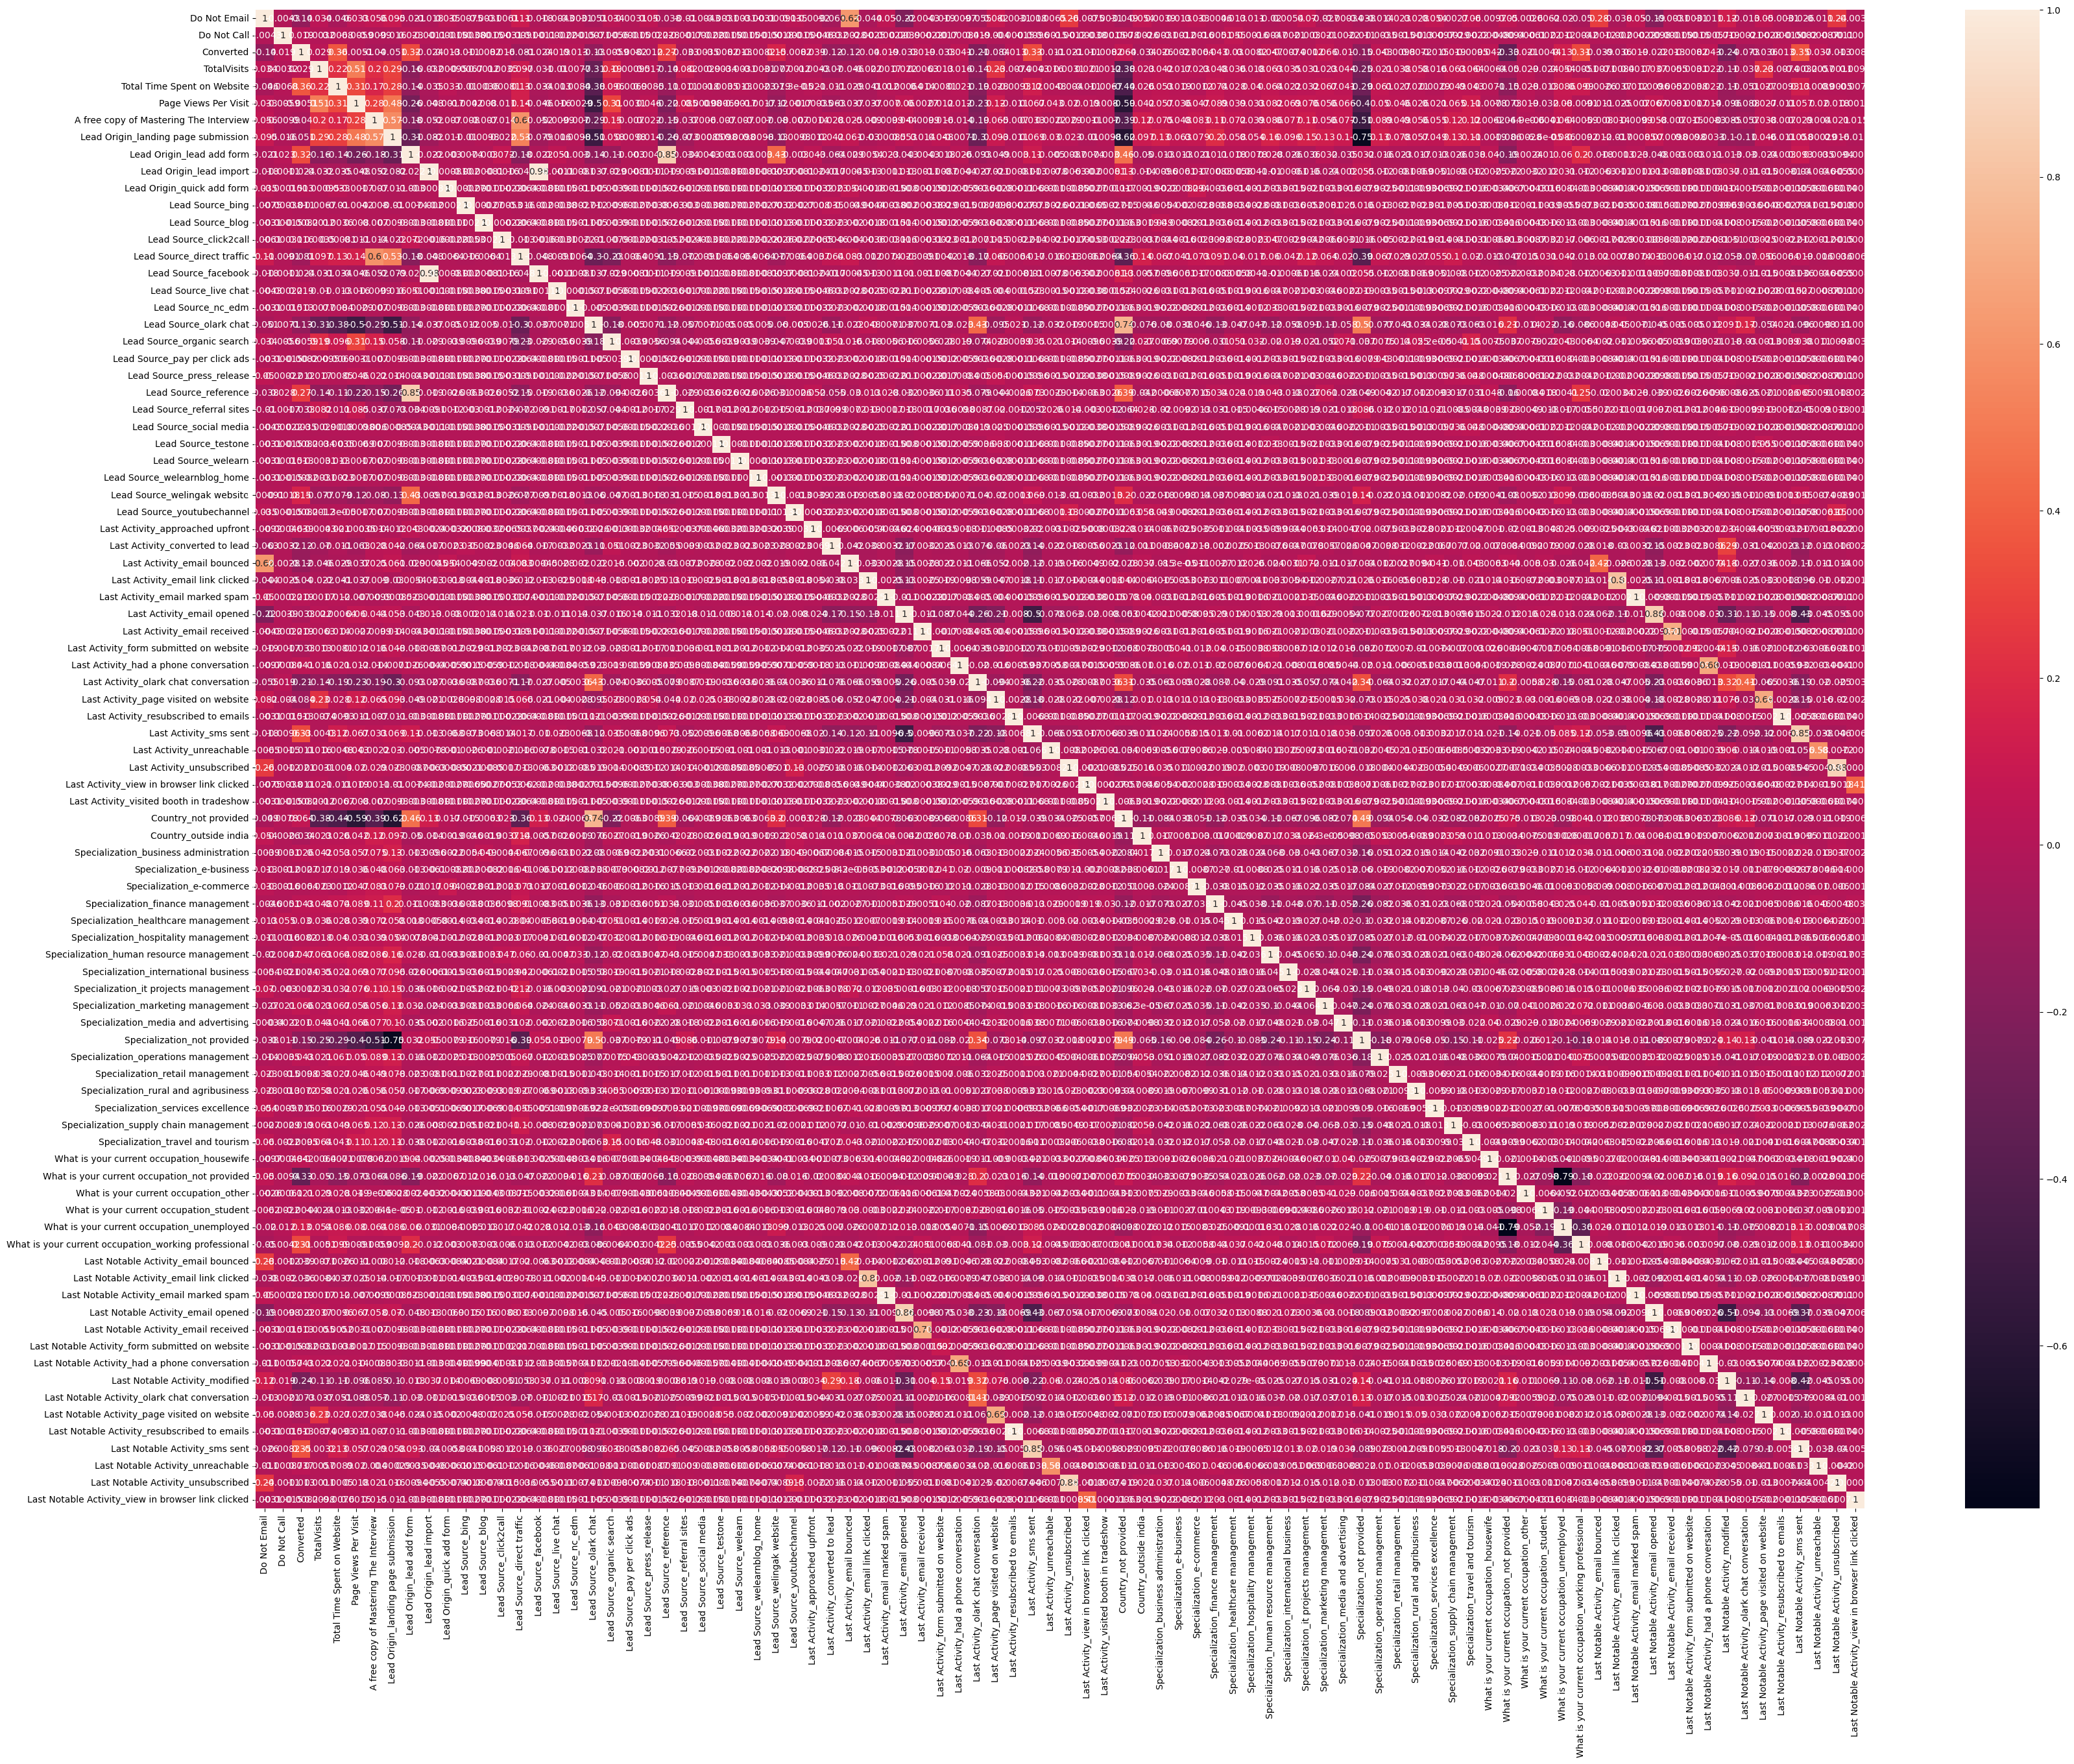

In [87]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,30))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

Now we move to model building.We see that there are many variables present in the dataset which we cannot deal with.so the best way to do this is to select a small feature of variables using RFE

### Step 7: Model Building


In [88]:
from sklearn.linear_model import LogisticRegression
# Importing the 'logisticRegression' and creating a logisticRegression object 
logreg=LogisticRegression()

In [89]:
# Importing the 'RFE' and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [90]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 26),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('A free copy of Mastering The Interview', False, 46),
 ('Lead Origin_landing page submission', True, 1),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', True, 1),
 ('Lead Origin_quick add form', False, 55),
 ('Lead Source_bing', False, 43),
 ('Lead Source_blog', False, 45),
 ('Lead Source_click2call', False, 14),
 ('Lead Source_direct traffic', False, 31),
 ('Lead Source_facebook', False, 15),
 ('Lead Source_live chat', False, 38),
 ('Lead Source_nc_edm', False, 13),
 ('Lead Source_olark chat', False, 56),
 ('Lead Source_organic search', False, 35),
 ('Lead Source_pay per click ads', False, 44),
 ('Lead Source_press_release', False, 48),
 ('Lead Source_reference', False, 50),
 ('Lead Source_referral sites', False, 47),
 ('Lead Source_social media', False, 18),
 ('Lead Source_testone', False, 72),
 ('

In [91]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [92]:

X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_quick add form',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_click2call',
       'Lead Source_direct traffic', 'Lead Source_facebook',
       'Lead Source_live chat', 'Lead Source_nc_edm', 'Lead Source_olark chat',
       'Lead Source_organic search', 'Lead Source_pay per click ads',
       'Lead Source_press_release', 'Lead Source_reference',
       'Lead Source_referral sites', 'Lead Source_social media',
       'Lead Source_testone', 'Lead Source_welearn',
       'Lead Source_welearnblog_home', 'Lead Source_youtubechannel',
       'Last Activity_converted to lead', 'Last Activity_email bounced',
       'Last Activity_email link clicked', 'Last Activity_email marked spam',
       'Last Activity_email opened', 'Last Activity_email received',
       'Last Activity_form submitted on website',
       'Last Activity_had a phone conversation',
       'Last Activity_ol

**All variables selected by RFE,next statistic part p_values and VIF's**

##### Assessing the model with StatsModels

In [93]:
# Selecting the columns selected by RFE
X_train=X_train[col]

## Model 1

In [94]:
# Import statsmodels

import statsmodels.api as sm

In [95]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2681.4
Date:                Fri, 21 Jun 2024   Deviance:                       5362.8
Time:                        23:16:08   Pearson chi2:                 6.97e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3936
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8431      0.118     -7.137      0.000      -1.075      -0.612
Do Not Email                                            -1.2972      0.164     -7.930      0.000      -1.618      -0.977
TotalVisits                                              3.5387      1.603      2.208      0.027       0.398       6.680
Total Time Spent on Website                              3.9513      0.151     26.167      0.000       3.655       4.247
Lead Origin_landing page submission                     -1.3793      0.120    -11.538      0.000      -1.614      -1.145
Lead Origin_lead add form                                2.4258      0.193     12.543      0.000       2.047       2.805
Lead Origin_lead import                                 -0.8639      0.513     -1.684      0.092      -1.869       0.142
Lead Source_welingak website                             2.4513      0.746      3.287      0.001       0.990       3.913
Last Activity_approached upfront                        23.5521   2.74e+04      0.001      0.999   -5.36e+04    5.37e+04
Last Activity_sms sent                                   1.4303      0.073     19.651      0.000       1.288       1.573
Specialization_not provided                             -0.9753      0.121     -8.067      0.000      -1.212      -0.738
What is your current occupation_housewife               23.8487   2.24e+04      0.001      0.999   -4.39e+04     4.4e+04
What is your current occupation_not provided            -1.0835      0.086    -12.562      0.000      -1.253      -0.914
What is your current occupation_working professional     2.4353      0.189     12.909      0.000       2.066       2.805
Last Notable Activity_had a phone conversation           3.4502      1.132      3.048      0.002       1.231       5.669
Last Notable Activity_unreachable                        1.9276      0.547      3.521      0.000       0.855       3.001
========================================================================================================================
"""

*There are quite a few varaibles which have p value>0.05 therefore we drop them.But we first check the VIF's*

### Checking VIF

In [96]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                 Lead Origin_landing page submission  2.46
2                         Total Time Spent on Website  1.93
9                         Specialization_not provided  1.65
11       What is your current occupation_not provided  1.56
1                                         TotalVisits  1.55
8                              Last Activity_sms sent  1.50
4                           Lead Origin_lead add form  1.41
6                        Lead Source_welingak website  1.26
12  What is your current occupation_working profes...  1.19
0                                        Do Not Email  1.11
5                             Lead Origin_lead import  1.01
7                    Last Activity_approached upfront  1.01
10          What is your current occupation_housewife  1.01
13     Last Notable Activity_had a phone conversation  1.00
14                  Last Notable Activity_unreachable  1.00

In [98]:
print(X_train.columns)

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Origin_lead import', 'Lead Source_welingak website',
       'Last Activity_approached upfront', 'Last Activity_sms sent',
       'Specialization_not provided',
       'What is your current occupation_housewife',
       'What is your current occupation_not provided',
       'What is your current occupation_working professional',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_unreachable'],
      dtype='object')


###### All VIF's are less then 5.so we drop columns with high p_values 

#### Model 2

In [99]:
X_train.drop('Lead Origin_lead import', axis = 1, inplace = True)

In [100]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2683.0
Date:                Fri, 21 Jun 2024   Deviance:                       5366.0
Time:                        23:16:11   Pearson chi2:                 6.97e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3933
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8623      0.117     -7.340      0.000      -1.093      -0.632
Do Not Email                                            -1.2942      0.164     -7.913      0.000      -1.615      -0.974
TotalVisits                                              3.5810      1.607      2.228      0.026       0.431       6.731
Total Time Spent on Website                              3.9539      0.151     26.187      0.000       3.658       4.250
Lead Origin_landing page submission                     -1.3623      0.119    -11.454      0.000      -1.595      -1.129
Lead Origin_lead add form                                2.4410      0.193     12.636      0.000       2.062       2.820
Lead Source_welingak website                             2.4479      0.746      3.283      0.001       0.986       3.910
Last Activity_approached upfront                        23.5592   2.73e+04      0.001      0.999   -5.36e+04    5.36e+04
Last Activity_sms sent                                   1.4301      0.073     19.659      0.000       1.287       1.573
Specialization_not provided                             -0.9683      0.121     -8.029      0.000      -1.205      -0.732
What is your current occupation_housewife               23.8500   2.24e+04      0.001      0.999   -4.39e+04     4.4e+04
What is your current occupation_not provided            -1.0812      0.086    -12.535      0.000      -1.250      -0.912
What is your current occupation_working professional     2.4338      0.189     12.910      0.000       2.064       2.803
Last Notable Activity_had a phone conversation           3.4520      1.132      3.050      0.002       1.234       5.670
Last Notable Activity_unreachable                        1.9322      0.547      3.532      0.000       0.860       3.005
========================================================================================================================
"""

#### Model 3

In [101]:
X_train.drop('Last Activity_approached upfront', axis = 1, inplace = True)

In [102]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2686.6
Date:                Fri, 21 Jun 2024   Deviance:                       5373.2
Time:                        23:16:12   Pearson chi2:                 6.98e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3926
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8627      0.117     -7.347      0.000      -1.093      -0.633
Do Not Email                                            -1.2972      0.164     -7.930      0.000      -1.618      -0.977
TotalVisits                                              3.5570      1.604      2.217      0.027       0.413       6.701
Total Time Spent on Website                              3.9580      0.151     26.229      0.000       3.662       4.254
Lead Origin_landing page submission                     -1.3585      0.119    -11.428      0.000      -1.592      -1.126
Lead Origin_lead add form                                2.4525      0.193     12.723      0.000       2.075       2.830
Lead Source_welingak website                             2.4330      0.746      3.263      0.001       0.972       3.894
Last Activity_sms sent                                   1.4261      0.073     19.612      0.000       1.284       1.569
Specialization_not provided                             -0.9622      0.121     -7.984      0.000      -1.198      -0.726
What is your current occupation_housewife               22.8442   1.36e+04      0.002      0.999   -2.66e+04    2.67e+04
What is your current occupation_not provided            -1.0847      0.086    -12.579      0.000      -1.254      -0.916
What is your current occupation_working professional     2.4309      0.188     12.897      0.000       2.062       2.800
Last Notable Activity_had a phone conversation           3.4500      1.132      3.048      0.002       1.232       5.669
Last Notable Activity_unreachable                        1.9302      0.547      3.527      0.000       0.858       3.003
========================================================================================================================
"""

#### Model 4

In [103]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [104]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2693.4
Date:                Fri, 21 Jun 2024   Deviance:                       5386.8
Time:                        23:16:13   Pearson chi2:                 7.00e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3914
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8547      0.117     -7.285      0.000      -1.085      -0.625
Do Not Email                                            -1.3026      0.164     -7.964      0.000      -1.623      -0.982
TotalVisits                                              3.4805      1.595      2.182      0.029       0.354       6.608
Total Time Spent on Website                              3.9555      0.151     26.240      0.000       3.660       4.251
Lead Origin_landing page submission                     -1.3529      0.119    -11.390      0.000      -1.586      -1.120
Lead Origin_lead add form                                2.4675      0.193     12.817      0.000       2.090       2.845
Lead Source_welingak website                             2.4176      0.746      3.243      0.001       0.956       3.879
Last Activity_sms sent                                   1.4181      0.073     19.522      0.000       1.276       1.560
Specialization_not provided                             -0.9660      0.120     -8.020      0.000      -1.202      -0.730
What is your current occupation_not provided            -1.0888      0.086    -12.634      0.000      -1.258      -0.920
What is your current occupation_working professional     2.4224      0.188     12.856      0.000       2.053       2.792
Last Notable Activity_had a phone conversation           3.4404      1.132      3.040      0.002       1.222       5.659
Last Notable Activity_unreachable                        1.9229      0.547      3.513      0.000       0.850       2.996
========================================================================================================================
"""

In [105]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.300881
6795    0.091591
3516    0.173139
8105    0.804947
3934    0.139628
4844    0.986767
3297    0.121754
8071    0.990560
987     0.186885
7423    0.914706
dtype: float64

In [106]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30088103, 0.091591  , 0.17313855, 0.8049474 , 0.13962768,
       0.98676723, 0.12175392, 0.99056019, 0.1868847 , 0.91470625])

##### Creating a dataframe with the actual converted  flag and the predicted probabilities

In [107]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.300881
1          0         0.091591
2          0         0.173139
3          0         0.804947
4          0         0.139628

### Creating new column 'Predicted' with 1 if Conversion_Prob > 0.5 else 0

In [108]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  predicted
0          0         0.300881          0
1          0         0.091591          0
2          0         0.173139          0
3          0         0.804947          1
4          0         0.139628          0

In [109]:
 #Let's check the overall accuracy.
from sklearn import metrics    
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8101422387136673


So, the overall accuracy hasnt dropped much 

In [110]:
# Let's take a look at the confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3574,  428],
       [ 800, 1666]], dtype=int64)

## Metrics beyond simply accuracy

In [111]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [112]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.67558799675588

In [113]:
# Let us calculate specificity
TN / float(TN+FP)

0.8930534732633684

In [114]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10694652673663169


In [115]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7956064947468959


In [116]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8171010516689529


* With cutoff of 0.5 we have sensitivity around 67%,specificity around 89% and accuracy around 80% 

### Step 8:Plotting the ROC Curve


An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [117]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [118]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

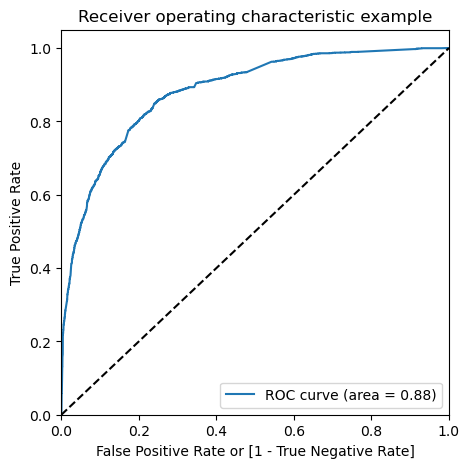

In [119]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Step 9:Finding Optimal Cutoff Point


Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [120]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.300881          0    1    1    1    1    0    0    0   
1          0         0.091591          0    1    0    0    0    0    0    0   
2          0         0.173139          0    1    1    0    0    0    0    0   
3          0         0.804947          1    1    1    1    1    1    1    1   
4          0         0.139628          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    1    1    0  
4    0    0    0

In [121]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.587972  0.984185  0.343828
0.2   0.2  0.760513  0.888483  0.681659
0.3   0.3  0.793908  0.848743  0.760120
0.4   0.4  0.806586  0.776967  0.824838
0.5   0.5  0.810142  0.675588  0.893053
0.6   0.6  0.803649  0.605434  0.925787
0.7   0.7  0.784477  0.515004  0.950525
0.8   0.8  0.767007  0.436740  0.970515
0.9   0.9  0.715523  0.268045  0.991254


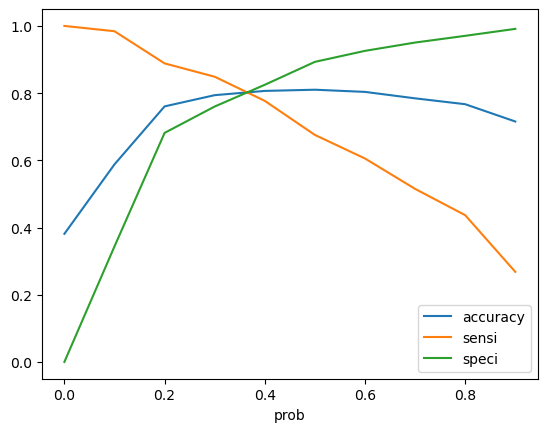

In [122]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [123]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.300881          0    1    1    1    1    0    0    0   
1          0         0.091591          0    1    0    0    0    0    0    0   
2          0         0.173139          0    1    1    0    0    0    0    0   
3          0         0.804947          1    1    1    1    1    1    1    1   
4          0         0.139628          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    1    1    0                1  
4    0    0    0                0

In [124]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8065862708719852

In [125]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3301,  701],
       [ 550, 1916]], dtype=int64)

In [126]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [127]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7769667477696675

In [128]:
# Let us calculate specificity
TN / float(TN+FP)

0.8248375812093953

In [129]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1751624187906047


In [130]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7321360336262897


In [131]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8571799532588938


## Precision and Recall

In [132]:
#Looking at the confusion matrix again

In [133]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3574,  428],
       [ 800, 1666]], dtype=int64)

##### Precision
TP / TP + FP

In [134]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7956064947468959

##### Recall
TP / TP + FN

In [135]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.67558799675588

Using sklearn utilities for the same

In [136]:
from sklearn.metrics import precision_score, recall_score

In [137]:
?precision_score

In [138]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7956064947468959

In [139]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.67558799675588

### Precision and recall tradeoff

In [140]:
from sklearn.metrics import precision_recall_curve

In [141]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [142]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

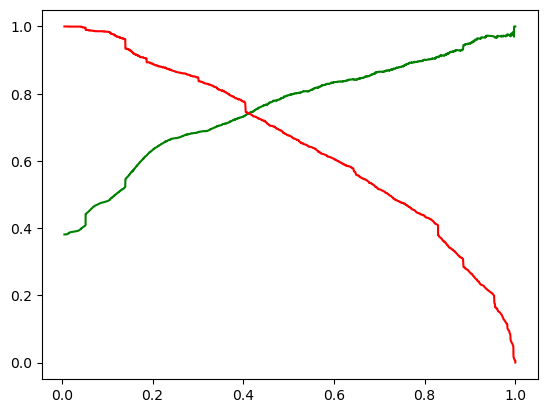

In [143]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [144]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.300881          0    1    1    1    1    0    0    0   
1          0         0.091591          0    1    0    0    0    0    0    0   
2          0         0.173139          0    1    1    0    0    0    0    0   
3          0         0.804947          1    1    1    1    1    1    1    1   
4          0         0.139628          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    1    1    0                1  
4    0    0    0                0

In [145]:
# Creating confusion matrix again
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion1

array([[3358,  644],
       [ 635, 1831]], dtype=int64)

In [146]:
# Substituting the value of true positive
TP = confusion1[1,1]
# Substituting the value of true negatives
TN = confusion1[0,0]
# Substituting the value of false positives
FP = confusion1[0,1] 
# Substituting the value of false negatives
FN = confusion1[1,0]

Precision
TP / TP + FP

In [147]:
confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])

0.7397979797979798

Recall
TP / TP + FN

In [148]:
confusion1[1,1]/(confusion1[1,0]+confusion1[1,1])

0.7424979724249797

* With current cut-off as 0.41 we have precision around 73% and recall around  74%

### Step 10:Making predictions on the test set




In [149]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [150]:
X_test = X_test[col]
X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
4269             0     0.031873                     0.444982   
2376             0     0.000000                     0.000000   
7766             0     0.019920                     0.025968   
9199             0     0.000000                     0.000000   
4359             0     0.000000                     0.000000   

      Lead Origin_landing page submission  Lead Origin_lead add form  \
4269                                    0                          0   
2376                                    0                          1   
7766                                    0                          0   
9199                                    0                          0   
4359                                    0                          1   

      Lead Origin_lead import  Lead Source_welingak website  \
4269                        0                             0   
2376                        0                             0   
7766                        0                             0   
9199                        0                             0   
4359                        0                             0   

      Last Activity_approached upfront  Last Activity_sms sent  \
4269                                 0                       1   
2376                                 0                       1   
7766                                 0                       0   
9199                                 0                       0   
4359                                 0                       0   

      Specialization_not provided  What is your current occupation_housewife  \
4269                            1                                          0   
2376                            1                                          0   
7766                            0                                          0   
9199                            1                                          0   
4359                            0                                          0   

      What is your current occupation_not provided  \
4269                                             1   
2376                                             0   
7766                                             0   
9199                                             0   
4359                                             0   

      What is your current occupation_working professional  \
4269                                                  0      
2376                                                  0      
7766                                                  1      
9199                                                  0      
4359                                                  0      

      Last Notable Activity_had a phone conversation  \
4269                                               0   
2376                                               0   
7766                                               0   
9199                                               0   
4359                                               0   

      Last Notable Activity_unreachable  
4269                                  0  
2376                                  0  
7766                                  1  
9199                                  0  
4359                                  0

In [151]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [152]:
y_test_pred = res.predict(X_test_sm)

In [153]:
y_test_pred[:10]

4269    0.598564
2376    0.884702
7766    0.975704
9199    0.139628
4359    0.829588
9186    0.588269
1631    0.403671
8963    0.212487
8007    0.065048
5324    0.384243
dtype: float64

In [154]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [155]:
# Let's see the head
y_pred_1.head()

0
4269  0.598564
2376  0.884702
7766  0.975704
9199  0.139628
4359  0.829588

In [156]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [157]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [158]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [159]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [160]:
y_pred_final.head()

Converted  Prospect ID         0
0          1         4269  0.598564
1          1         2376  0.884702
2          1         7766  0.975704
3          0         9199  0.139628
4          1         4359  0.829588

In [161]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [162]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID', 'Converted', 'Conversion_Prob'], axis=1)

In [163]:
# Let's see the head of y_pred_final
y_pred_final.head()

Prospect ID  Converted  Conversion_Prob
0         4269          1         0.598564
1         2376          1         0.884702
2         7766          1         0.975704
3         9199          0         0.139628
4         4359          1         0.829588

In [164]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)

In [165]:
y_pred_final.head()

Prospect ID  Converted  Conversion_Prob  final_predicted
0         4269          1         0.598564                1
1         2376          1         0.884702                1
2         7766          1         0.975704                1
3         9199          0         0.139628                0
4         4359          1         0.829588                1

In [166]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7954545454545454

In [167]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1405,  272],
       [ 295,  800]], dtype=int64)

In [168]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [169]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.730593607305936

In [170]:
# Let us calculate specificity
TN / float(TN+FP)

0.8378056052474657

In [171]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.746268656716418

In [172]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.730593607305936

- With cutoff of 0.41 we have Precision around 75% and recall around 73%

## Conclusion 

It was found that the variables that mattered the most in potential buyers are:
- Total Time Spent on website 
- Total number of visits 
- When the lead source was Google,Direct Traffic,Organic Search
- When the last activity was SMS,Olark Chat Conversation
- When lead orgin is lead add format 
Keeping this in mind the X_Education can flourish as they have high chances to get almost all potetial buyers to change their mind and buy the courses